In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('SNP_status.txt', delim_whitespace=True, low_memory=False)
df = pd.DataFrame(data)

In [3]:
case = df[df['Status']=='Case']
case = case.drop('Status', 1)
control = df[df['Status']=='Control']
control = control.drop('Status', 1)

In [4]:
S, pvalue = stats.ttest_ind(case, control)
S.tolist()
S[np.isnan(S)]=0
pvalue[np.isnan(pvalue)]=1

In [5]:
alpha = 0.05/100000
threshold = stats.norm.ppf(alpha/2)
sig_snp_index = np.where((S<threshold) | (S>-threshold))
sig_snp = sig_snp_index[0].tolist()

In [24]:
S2 = S**2
chi_stat = stats.chi2.median(df=1)
lambda_gc = np.median(S2)/chi_stat

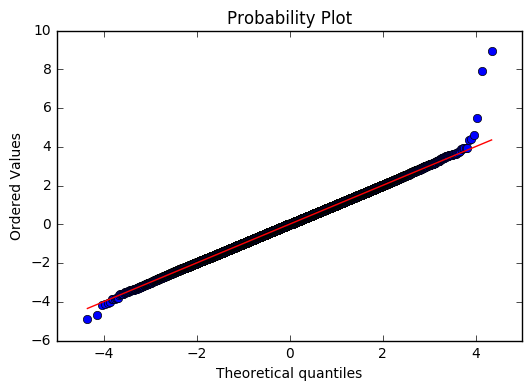

In [25]:
stats.probplot(S, plot=plt)
plt.show()

From the Q-Q plot, we can see that aside from some few exteme values, almost all the values align with the theoretical values, suggesting that the data are normally distributed.

In [26]:
fout = open('PA1_304743326.txt', 'w+')
header = 'UID:304743326\n'+'email:a5834929@gmail.com\n'+'Undergrad or Grad:Grad\n'
fout.write(header+'<A>\n')
for i in range(len(pvalue)):
    fout.write('SNP%05d:%.10f\n' % (i, pvalue[i]))
fout.write('</A>\n<B>\n')
for i in sig_snp:
    fout.write('SNP%05d\n' % i)
fout.write('</B>\n<C>\nLambda_gc:%.10f\n</C>' % lambda_gc)
fout.close()